<a href="https://colab.research.google.com/github/niteshkumar0205/machine-learning-/blob/main/ml_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/SairamTadepalli19/Day5_ML/main/Car.csv")

In [3]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
data.shape

(804, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
data.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

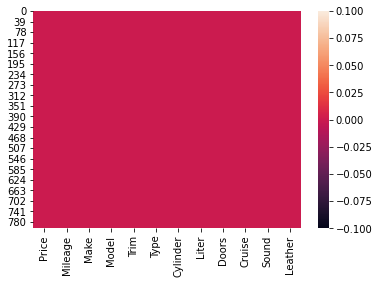

In [7]:
sns.heatmap(data.isnull())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


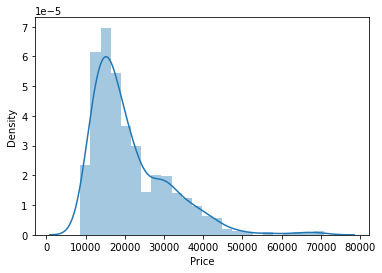

In [8]:
sns.distplot(data['Price'])

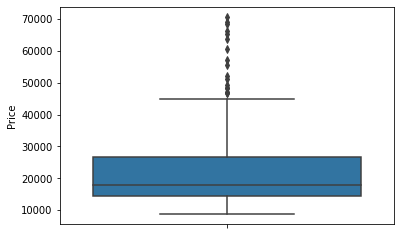

In [9]:
sns.boxplot(y = data['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


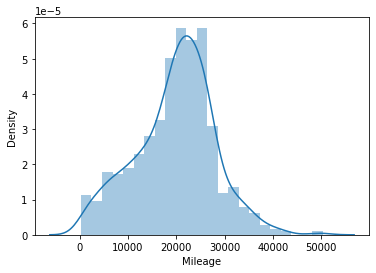

In [10]:
sns.distplot(data["Mileage"])

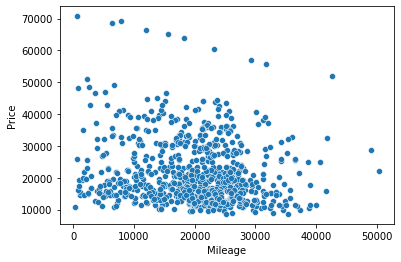

In [11]:
sns.scatterplot(x= data["Mileage"],y = data["Price"])

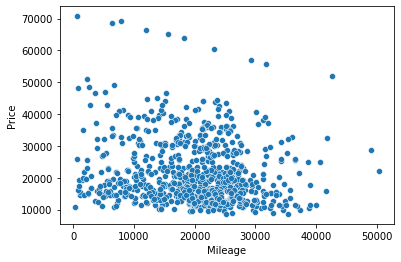

In [12]:
sns.scatterplot(x= data["Mileage"], y = data["Price"])

In [13]:
data['Make'].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

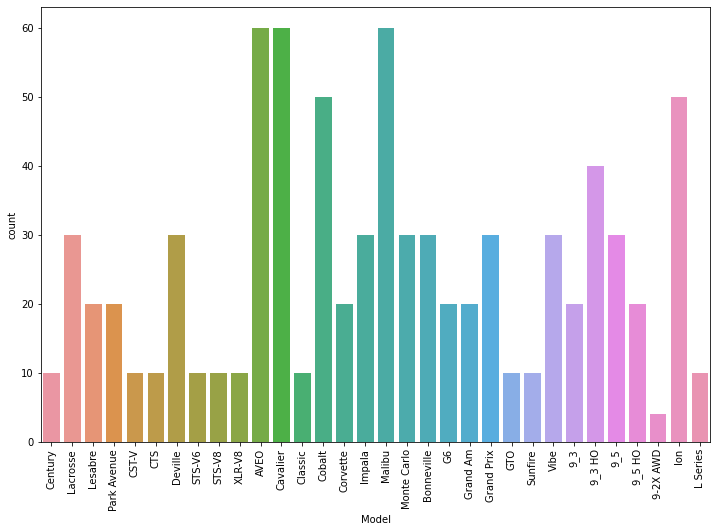

In [14]:
plt.figure(figsize = (12,8))
sns.countplot(x = data['Model'])
plt.xticks(rotation = 90)
plt.show()

In [15]:
#Transformation

#MinMaxScaler Operation

from sklearn.preprocessing import MinMaxScaler

cat_col = ['Make', 'Model', 'Trim', 'Type']

df_2 = pd.get_dummies(data[cat_col], drop_first = True)

In [16]:
#MinMaxScaler iplementation

scale = MinMaxScaler()
data['Mileage1'] = scale.fit_transform(data[['Mileage']])

In [17]:
#Check the updated dataset

data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage1
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,0.158716
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0.176952
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0.257976
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,0.320744
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,0.390375


In [18]:
data.drop(cat_col, axis = 1, inplace = True)

In [19]:
data.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage1
0,17314.10313,8221,6,3.1,4,1,1,1,0.158716
1,17542.03608,9135,6,3.1,4,1,1,0,0.176952
2,16218.84786,13196,6,3.1,4,1,1,0,0.257976
3,16336.91314,16342,6,3.1,4,1,0,0,0.320744
4,16339.17032,19832,6,3.1,4,1,0,1,0.390375


In [20]:
data_new = pd.concat([data, df_2], axis = 1)

In [21]:
data_new.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage1,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9_3,Model_9_3 HO,Model_9_5,Model_9_5 HO,Model_AVEO,Model_Bonneville,Model_CST-V,Model_CTS,Model_Cavalier,Model_Century,Model_Classic,Model_Cobalt,Model_Corvette,Model_Deville,Model_G6,Model_GTO,Model_Grand Am,Model_Grand Prix,Model_Impala,Model_Ion,Model_L Series,Model_Lacrosse,Model_Lesabre,Model_Malibu,Model_Monte Carlo,Model_Park Avenue,...,Trim_Coupe 2D,Trim_Custom Sedan 4D,Trim_DHS Sedan 4D,Trim_DTS Sedan 4D,Trim_GT Coupe 2D,Trim_GT Sedan 4D,Trim_GT Sportwagon,Trim_GTP Sedan 4D,Trim_GXP Sedan 4D,Trim_Hardtop Conv 2D,Trim_L300 Sedan 4D,Trim_LS Coupe 2D,Trim_LS Hatchback 4D,Trim_LS MAXX Hback 4D,Trim_LS Sedan 4D,Trim_LS Sport Coupe 2D,Trim_LS Sport Sedan 4D,Trim_LT Coupe 2D,Trim_LT Hatchback 4D,Trim_LT MAXX Hback 4D,Trim_LT Sedan 4D,Trim_Limited Sedan 4D,Trim_Linear Conv 2D,Trim_Linear Sedan 4D,Trim_Linear Wagon 4D,Trim_MAXX Hback 4D,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.10313,8221,6,3.1,4,1,1,1,0.158716,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,17542.03608,9135,6,3.1,4,1,1,0,0.176952,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16218.84786,13196,6,3.1,4,1,1,0,0.257976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,16336.91314,16342,6,3.1,4,1,0,0,0.320744,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,16339.17032,19832,6,3.1,4,1,0,1,0.390375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [22]:
#Implement Simple Linear Regression

x = data_new[['Mileage1']]
y = data_new[['Price']]

In [23]:
#Split the dataset into test and train sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [24]:

x_train.shape

(603, 1)

In [25]:

y_train.shape

(603, 1)

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lr.predict(x_test)

array([[22392.48962365],
       [21783.20620978],
       [21498.54869858],
       [21923.93998262],
       [19235.36198632],
       [20930.35954638],
       [20497.2748161 ],
       [20369.86384042],
       [24849.7012974 ],
       [21425.17949168],
       [20948.93640439],
       [23483.27018566],
       [19686.64828455],
       [18835.11513637],
       [21917.37240655],
       [20592.22320151],
       [22318.36983662],
       [22941.72662778],
       [21801.78306779],
       [20997.53646728],
       [19343.44552386],
       [19473.85882002],
       [21675.12267224],
       [24223.71747582],
       [24657.17749616],
       [23216.81424242],
       [20692.42564777],
       [24786.65256717],
       [20777.80413662],
       [18505.61046289],
       [23359.42446556],
       [20313.38268626],
       [22099.76337615],
       [21760.68880612],
       [22708.85914499],
       [21328.542301  ],
       [22187.39360537],
       [21125.13508799],
       [21947.95854651],
       [17556.6895439 ],


In [28]:
# Predict the test set results

predict = lr.predict(x_test)

In [29]:

from sklearn.metrics import mean_squared_error as mse

mse(y_test, predict)

75205175.46518917